In [1]:
import numpy as np
import numpy.linalg as LA
import jax
import jax.numpy as jnp
import jax.numpy.linalg as JLA

from jax.example_libraries import optimizers

import optax

import matplotlib.pyplot as plt
from tqdm.notebook import trange
from functools import partial
from sklearn.datasets import fetch_openml

In [2]:
digits = fetch_openml(name='mnist_784', version=1);

/opt/conda/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [27]:
K = 50

n = 784
m = 512
num_itr = 25
adam_lr = 5e-5
max_inner = 50
A = jnp.array(np.random.randn(m, n))
gamma_opt = 1./jnp.max(JLA.eigvals(A.T@A))

In [37]:
xtrain = jnp.array(digits["data"])[:60000,:] / 255.
xtest = jnp.array(digits["data"])[60000:,:] / 255.

In [38]:
def train_loader(batch_size, head_idx=0, shuffle=True):
    if shuffle:
        idxs = jnp.array(np.random.randint(0, 60000, batch_size))
        return jnp.copy(xtrain[idxs, :].T)
    else:
        return jnp.copy(xtrain[head_idx:head_idx+batch_size, :].T)

def test_loader(batch_size, head_idx):
    return jnp.copy(xtrain[head_idx:head_idx+batch_size, :].T)

In [39]:
def mini_batch(K):
    x_org = train_loader(K)
    y = A@x_org
    return x_org,y

def test_mini_batch(K, idx):
    x_org = test_loader(K, idx)
    y = A@x_org
    return x_org, y

In [56]:
def show_img(x):
    n_data = 16
    row = 4
    col = 4
    fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(8,6))

    fig.suptitle("MNIST data-set", fontsize=24)
    for i in range(n_data):
        _r= i//col
        _c= i%col
        ax[_r,_c].axes.xaxis.set_visible(False)
        ax[_r,_c].axes.yaxis.set_visible(False)
        ax[_r,_c].imshow(np.array(x[:,i]).reshape(28,28), cmap='bone')

In [57]:
x, _ = mini_batch(K)

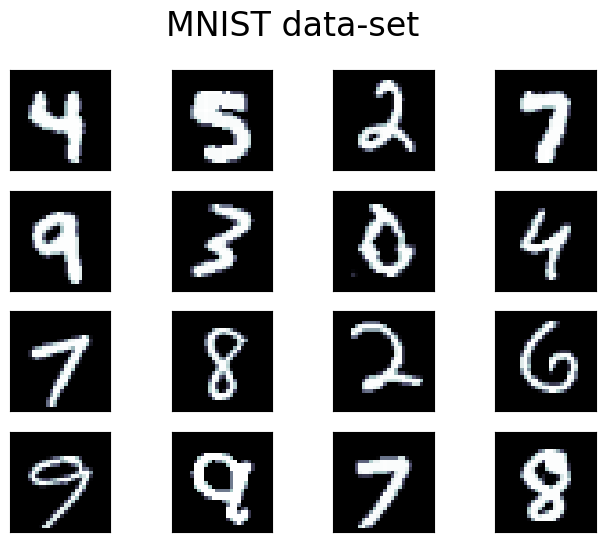

In [58]:
show_img(x)